# [CoE202] note 03c. Linear regression with closed form solution (n-D)

- Class Date : 2021.03.18.
- Office Hour : -----------
- If you have any questions, upload on KLMS Q&A board, or ask directly at the TA office hours (Zoom)

In [1]:
# this is just an annotation
import numpy as np # this is for importing numpy library (and we will use abbreviation np for that)
import matplotlib.pyplot as plt # this is for importing matplotlib.pyplot (library for graph plot)

## 1. Linear regression extension

In this example, we have multi-dimensional independent variable.
Let's see how we can perform linear regression.

In [2]:
# data points
X = np.array([[0.0, 1.0], [1.0, 1.0], [2.0, 2.0], [3.0, 1.0],  [4.0, 1.0],  [5.0, 3.0]]) 
y = np.array([0.0, 1.1, 0.9, 3.1, 3.8, 3.1])

As you can see below. we have two independent variables and one dependent variable.

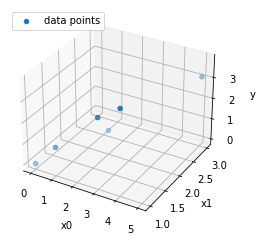

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label = 'data points') 
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.show()

Below, we need to fill out a function that converts datapoints into a feature matrix.
We also need a function that can vectorize y.

In [4]:
def linear_features(x, K):    
    # X: inputs of size N x 2
    # K: dimension of input data x
    # computes the feature matrix Phi (N x (K+1))    
    X = x.reshape(-1, K)  # 6 x K vector, N=6, D=K
    N, D = X.shape    
    X_aug = np.hstack([np.ones((N, 1)), X])  # augmented X of size 6 x (K+1)
    return X_aug

def vectorize_y(y)    :
    y_vec = y.reshape(-1, 1)  # 6 x 1 vector, N=6
    return y_vec

In [5]:
# convert our data into matrix form
X_aug = linear_features(X, 2)
y_vec = vectorize_y(y)

## 1-1. Linear regression with gradient descent

We can use gradient descent for linear regression.


Let's fill out the function below.

In [6]:
def np_linear_regression(X_aug, y):    
    # X: m x 3 matrix of training inputs
    # y: m x 1 vector of training targets/observations
    # returns: coefficients  (3 x 1)
    
    theta = (np.linalg.inv(X_aug.T @ X_aug) @ X_aug.T) @ y

    return theta

# linear fitting using gradient descent
def np_linearfit_gd(X_aug, y_vec):    
    # X: m x 3 matrix of training inputs
    # y: m x 1 vector of training targets/observations
    # returns: coefficients  (3 x 1)
    
    # set the learning rate
    alpha =  0.01
    # set the number of iterations
    num_iter = 1000
    
    # initialize theta
    theta =  np.zeros((3, 1))

    # iteratively apply gradient descent
    for i in range(num_iter):
        # calculate gradients
        grad_L = 0.5 * X_aug.T @ (X_aug @ theta - y_vec)

        # update theta
        theta = theta - alpha * grad_L
  
    return theta      

And then perform the regression.

In [11]:
# get coefficients 
theta = np_linear_regression(X_aug, y_vec)
theta_gd = np_linearfit_gd(X_aug, y_vec)
print(theta)
print(theta_gd)

[[ 0.96829268]
 [ 0.9804878 ]
 [-0.94634146]]
[[ 0.95853757]
 [ 0.98032848]
 [-0.94060302]]


To visualize our function, we are going to create a 2-d grid as a test data
and then evaluate the value of our linear function at the grid points.

In [9]:
# plot results
xp0 = np.linspace(0, 5, 100) 
xp1 = np.linspace(0, 5, 100)
Xtest = np.mgrid[0:5:0.25, 0:5:0.25].reshape(2,-1).T  # 10000 x 2 vector for test inputs
Xtest_aug = np.hstack([np.ones((Xtest.shape[0],1)), Xtest])

prediction = Xtest_aug @ theta

Let's visualize the plane and see if it seems to agree with the data points!

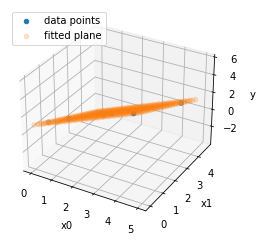

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], y, label = 'data points') 
ax.scatter(Xtest[:, 0], Xtest[:, 1], prediction, label = 'fitted plane', alpha=0.2)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('y')
plt.legend(loc='upper left')
plt.show()